In [1]:
import plotly.offline as pyo
import pandas as pd
import plotly.express as px

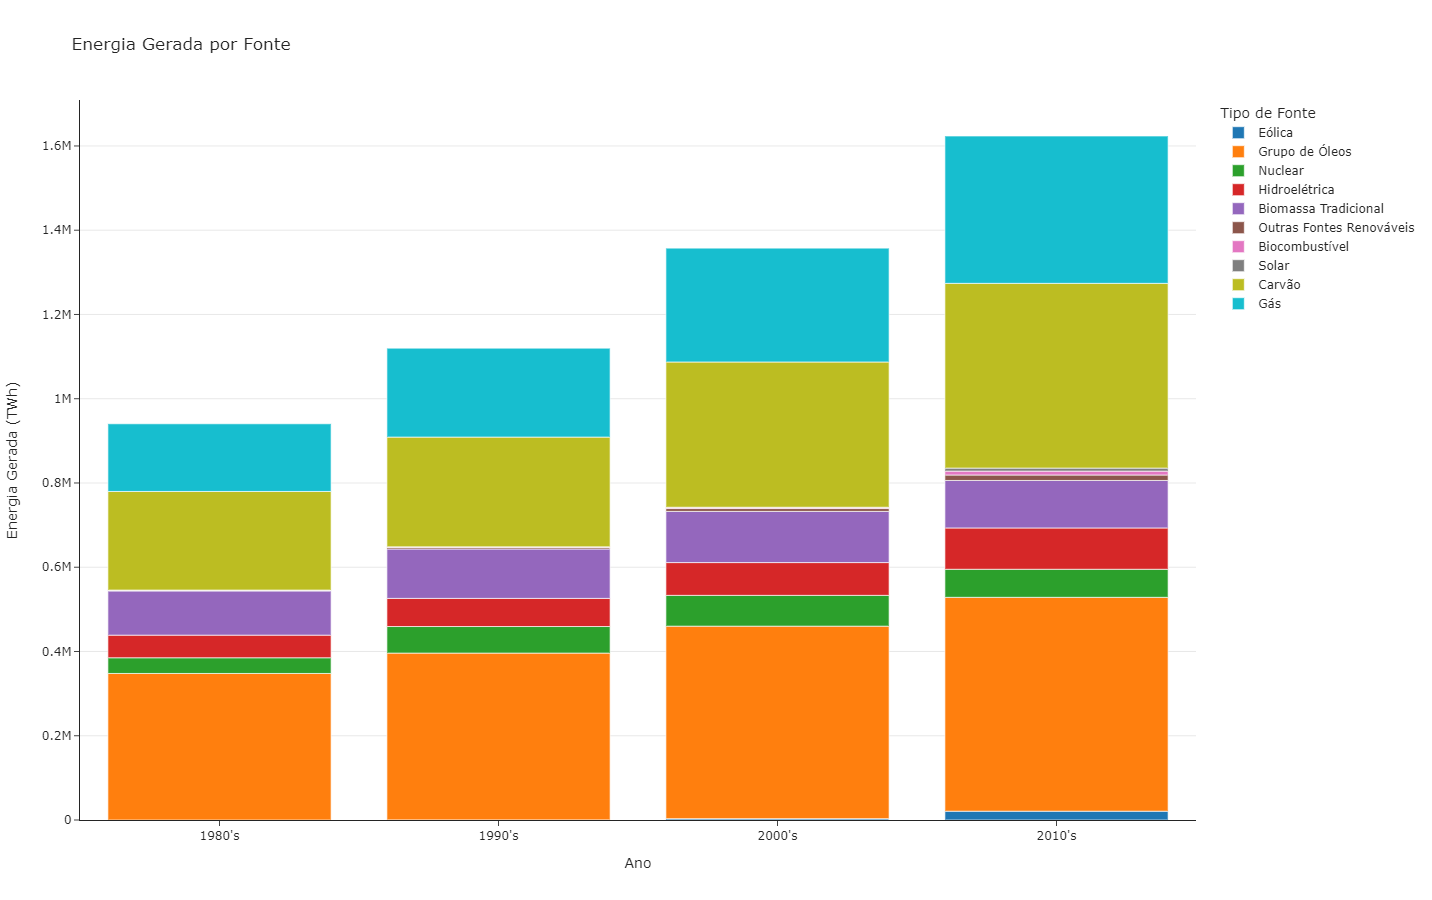

In [52]:
# Gráfico comparando todas as fontes com stacked bar chart

dados2 = pd.read_csv("datasets/global-energy-substitution.csv")

# Tirando as colunas Entity e Code
dados2.drop(columns=["Code", "Entity"], inplace=True)

# Formando linhas com a soma dos dados em intervalos de 10 anos
dados2_1980_1989 = dados2.loc[(dados2.loc[:, "Year"] >= 1980) & (dados2.loc[:, "Year"] < 1990)]
dados2_1990_1999 = dados2.loc[(dados2.loc[:, "Year"] >= 1990) & (dados2.loc[:, "Year"] < 2000)]
dados2_2000_2009 = dados2.loc[(dados2.loc[:, "Year"] >= 2000) & (dados2.loc[:, "Year"] < 2010)]
dados2_2010_2019 = dados2.loc[(dados2.loc[:, "Year"] >= 2010) & (dados2.loc[:, "Year"] < 2020)]

# Criando dataframes para a fusão posterior
df1 = pd.DataFrame()
df1["Source"] = dados2_1980_1989.columns[1:]
df1["Year"] = "1980's"
df1["(TWh; substituted energy)"] = dados2_1980_1989.sum(axis=0).iloc[1:].values
df2 = pd.DataFrame()
df2["Source"] = dados2_1990_1999.columns[1:]
df2["Year"] = "1990's"
df2["(TWh; substituted energy)"] = dados2_1990_1999.sum(axis=0).iloc[1:].values
df3 = pd.DataFrame()
df3["Source"] = dados2_2000_2009.columns[1:]
df3["Year"] = "2000's"
df3["(TWh; substituted energy)"] = dados2_2000_2009.sum(axis=0).iloc[1:].values
df4 = pd.DataFrame()
df4["Source"] = dados2_2010_2019.columns[1:]
df4["Year"] = "2010's"
df4["(TWh; substituted energy)"] = dados2_2010_2019.sum(axis=0).iloc[1:].values

# Criando novo dataframe para fundir outros dataframes
novo_dataframe = pd.DataFrame()

novo_dataframe = novo_dataframe.append(df1, ignore_index=True)
novo_dataframe = novo_dataframe.append(df2, ignore_index=True)
novo_dataframe = novo_dataframe.append(df3, ignore_index=True)
novo_dataframe = novo_dataframe.append(df4, ignore_index=True)

# print(novo_dataframe)
colorsIdx_1 = {"Wind (TWh; substituted energy)": "Eólica",
             "Oil (TWh; substituted energy)": "Grupo de Óleos",
             "Nuclear (TWh; substituted energy)": "Nuclear",
             "Hydropower (TWh; substituted energy)": "Hidroelétrica",
             "Traditional bimass (TWh; substituted energy)": "Biomassa Tradicional",
             "Other renewables (TWh; substituted energy)": "Outras Fontes Renováveis",
             "Biofuels (TWh; substituted energy)": "Biocombustível",
             "Solar (TWh; substituted energy)": "Solar",
             "Coal (TWh; substituted energy)": "Carvão",
             "Gas (TWh; substituted energy)": "Gás"}
col_1 = novo_dataframe["Source"].map(colorsIdx_1)

fig1 = px.bar(novo_dataframe,
              x="Year",
              y="(TWh; substituted energy)",
              color=col_1,
              title="Energia Gerada por Fonte",
              labels={"color": "Tipo de Fonte",
                      "Year": "Ano",
                      "(TWh; substituted energy)": "Energia Gerada (TWh)"},
              template="simple_white",
              width=1300,
              height=900,
              )
fig1.update_yaxes(showgrid=True)
fig1.update_layout(hovermode="x unified")

# Comparando a Energia Gerada por Fontes de Energia no Globo
    Primeiramente, um aumento é visivelmente notável com relação a quantidade de energia que se gerava a algumas décadas atrás com relação ao que é gerada atualmente, isso por conta da industrialização e automação em massa e devido também ao crescimento abrupto de toda a população global. Com isso, analisando conjuntamente períodos de 10 em 10 anos pode-se observar um leve aumento de fontes alternativas, porém estas são conseguiram substituir de maneira absoluta as que previamente predominavam no setor de energia, essas sendo o carvão, o gás e o grupo de óleos variados. Mas,  com o objetivo de substituição quase que total de certos tipos de combustíveis, leis ja foram sancionadas e implementadas para que haja uma redução no uso de fonte de energia não renováveis por questões tanto ambientais como de saúde pública.

In [2]:
# código para exibição do primeiro gráfico se necessário
#fig1.show()

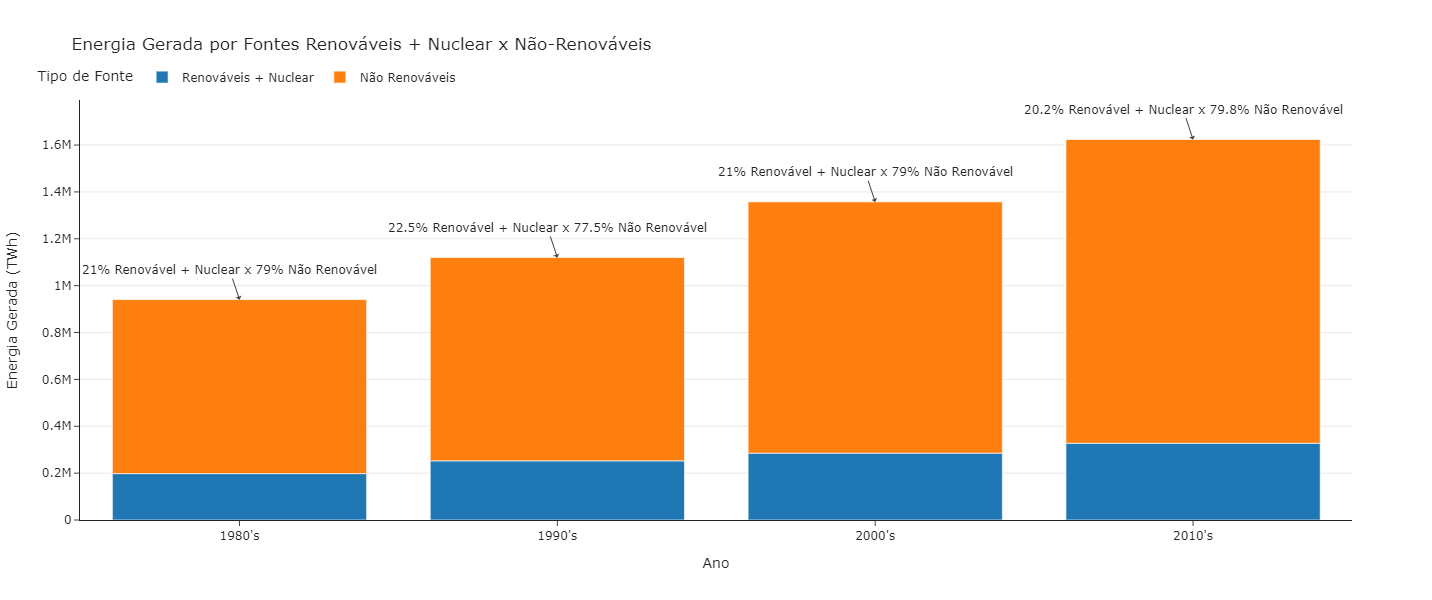

In [29]:
# Gráfico comparando fontes renovaveis + nuclear x não renovaveis

dados2 = pd.read_csv("datasets/global-energy-substitution.csv")

# Tirando as colunas Entity e Code
dados2.drop(columns=["Code", "Entity"], inplace=True)


## Novas colunas com dados da soma dos dados separadamente
r_x_nr = pd.DataFrame()
r_x_nr["Year"] = dados2["Year"]
r_x_nr["Renovaveis + Nuclear"] = dados2[["Wind (TWh; substituted energy)",
                                         "Nuclear (TWh; substituted energy)",
                                         "Hydropower (TWh; substituted energy)",
                                         "Traditional bimass (TWh; substituted energy)",
                                         "Other renewables (TWh; substituted energy)",
                                         "Biofuels (TWh; substituted energy)",
                                         "Solar (TWh; substituted energy)"]].sum(axis=1)
r_x_nr["Nao Renovaveis"] = dados2[["Oil (TWh; substituted energy)",
                                   "Coal (TWh; substituted energy)",
                                   "Gas (TWh; substituted energy)"]].sum(axis=1)

# Formando linhas com a soma dos dados em intervalos de 10 anos
dadosb_1980_1989 = r_x_nr.loc[(r_x_nr.loc[:, "Year"] >= 1980) & (r_x_nr.loc[:, "Year"] < 1990)]
dadosb_1990_1999 = r_x_nr.loc[(r_x_nr.loc[:, "Year"] >= 1990) & (r_x_nr.loc[:, "Year"] < 2000)]
dadosb_2000_2009 = r_x_nr.loc[(r_x_nr.loc[:, "Year"] >= 2000) & (r_x_nr.loc[:, "Year"] < 2010)]
dadosb_2010_2019 = r_x_nr.loc[(r_x_nr.loc[:, "Year"] >= 2010) & (r_x_nr.loc[:, "Year"] < 2020)]

# Criando dataframes para a fusão posterior
dfa = pd.DataFrame()
dfa["Source"] = dadosb_1980_1989.columns[1:]
dfa["Year"] = "1980's"
dfa["(TWh; substituted energy)"] = dadosb_1980_1989.sum(axis=0).iloc[1:].values
dfb = pd.DataFrame()
dfb["Source"] = dadosb_1990_1999.columns[1:]
dfb["Year"] = "1990's"
dfb["(TWh; substituted energy)"] = dadosb_1990_1999.sum(axis=0).iloc[1:].values
dfc = pd.DataFrame()
dfc["Source"] = dadosb_2000_2009.columns[1:]
dfc["Year"] = "2000's"
dfc["(TWh; substituted energy)"] = dadosb_2000_2009.sum(axis=0).iloc[1:].values
dfd = pd.DataFrame()
dfd["Source"] = dadosb_2010_2019.columns[1:]
dfd["Year"] = "2010's"
dfd["(TWh; substituted energy)"] = dadosb_2010_2019.sum(axis=0).iloc[1:].values

# Criando novo dataframe para fundir outros dataframes
novo_dataframe_b = pd.DataFrame()

novo_dataframe_b = novo_dataframe_b.append(dfa, ignore_index=True)
novo_dataframe_b = novo_dataframe_b.append(dfb, ignore_index=True)
novo_dataframe_b = novo_dataframe_b.append(dfc, ignore_index=True)
novo_dataframe_b = novo_dataframe_b.append(dfd, ignore_index=True)


## Gráfico comparativo 2 e suas configurações
colorsIdx_b = {"Renovaveis + Nuclear": "Renováveis + Nuclear",
               "Nao Renovaveis": "Não Renováveis"}
col_b = novo_dataframe_b["Source"].map(colorsIdx_b)

fig2 = px.bar(novo_dataframe_b,
              x="Year",
              y="(TWh; substituted energy)",
              color=col_b,
              title="Energia Gerada por Fontes Renováveis + Nuclear x Não-Renováveis",
              labels={"color": "Tipo de Fonte",
                      "Year": "Ano",
                      "(TWh; substituted energy)": "Energia Gerada (TWh)"},
              template="simple_white",
              width=1300,
              height=600,
              )
fig2.update_yaxes(showgrid=True)
fig2.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.3)
)
fig2.add_annotation(text="21% Renovável + Nuclear x 79% Não Renovável",
                    x="1980's", y=940528, arrowhead=1, showarrow=True
                    )
fig2.add_annotation(text="22.5% Renovável + Nuclear x 77.5% Não Renovável",
                    x="1990's", y=1119993, arrowhead=1, showarrow=True
                    )
fig2.add_annotation(text="21% Renovável + Nuclear x 79% Não Renovável",
                    x="2000's", y=1357493, arrowhead=1, showarrow=True
                    )
fig2.add_annotation(text="20.2% Renovável + Nuclear x 79.8% Não Renovável",
                    x="2010's", y=1623636, arrowhead=1, showarrow=True
                    )
fig2.update_layout(hovermode="x unified")

# Comparando a Energia Gerada por Fontes Renováveis + Nuclear x Não Renováveis
   Agora, veja a proporção entre energias renováveis somadas com a nuclear e das não renováveis. Perceba que há um aumenta tanto de uma quanto de outra com relação a quantidade de uso ao longo dos anos e de fato as renováveis tem tomado um espaço maior, mas não com relação ao escopo geral. Com isso, olhe também que as proporções, globalmente, se mantém relativamente estaveis por um tempo e até chegam a diminuir em si trantando de fontes renováveis + nuclear, não querendo dizer que não está havendo um progresso com o seu uso e com a eficiência das tecnologias adotadas para tal, mas querendo possivelmente dizer que o ritmo da redução no uso dos recursos não renováveis não está ocorrendo da maneira planejada/mais adequada.

In [ ]:
# código para exibição do segundo gráfico se necessário
#fig2.show()

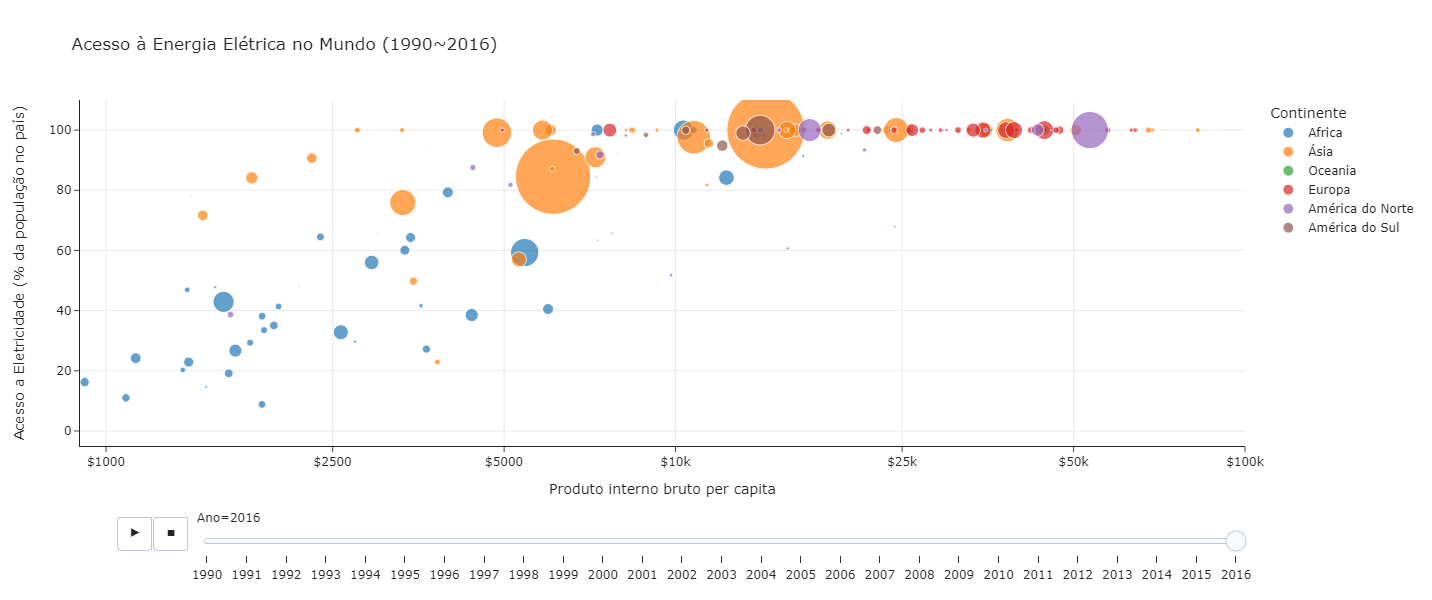

In [40]:
import pandas as pd
import plotly.express as px


pd.set_option("display.max_rows", 20, "display.max_columns", 10)

base_1 = pd.read_csv("datasets/access-to-electricity-vs-gdp-per-capita.csv")



# Tirando a coluna continentes por estar incompleta e errada
base_1.drop(columns=["Continent"], inplace=True)

dataset = pd.DataFrame(base_1.loc[(base_1.loc[:, "Year"] >= 1990) & (base_1.loc[:, "Year"] <= 2016)])

# print(dataset.head())

# Adicionando continente aos países
Africa = pd.read_csv("datasets/Countries-Africa.csv")
Asia = pd.read_csv("datasets/Countries-Asia.csv")
Australia_NZ = pd.read_csv("datasets/Countries-Australia-NZ.csv")
Europe = pd.read_csv("datasets/Countries-Europe.csv")
North_America = pd.read_csv("datasets/Countries-North-America.csv")
South_America = pd.read_csv("datasets/Countries-South-America.csv")


Africa_df = pd.DataFrame()
Asia_df = pd.DataFrame()
Australia_NZ_df = pd.DataFrame()
Europe_df = pd.DataFrame()
North_America_df = pd.DataFrame()
South_America_df = pd.DataFrame()


# Criando um novo dataset
for codigo in dataset["Code"].unique():
    # Separando o subdataset que contém a parte com o país de tal codigo
    dataset_codigo = pd.DataFrame(dataset.loc[dataset.loc[:, "Code"] == f"{codigo}"])

    if codigo in list(Africa["ISO alpha 3"]):
        Africa_df = Africa_df.append(dataset_codigo, ignore_index=True)
        Africa_df["Continent"] = "Africa"
    if codigo in list(Asia["ISO alpha 3"]):
        Asia_df = Asia_df.append(dataset_codigo, ignore_index=True)
        Asia_df["Continent"] = "Asia"
    if codigo in list(Australia_NZ["ISO alpha 3"]):
        Australia_NZ_df = Australia_NZ_df.append(dataset_codigo, ignore_index=True)
        Australia_NZ_df["Continent"] = "Australia_NZ"
    if codigo in list(Europe["ISO alpha 3"]):
        Europe_df = Europe_df.append(dataset_codigo, ignore_index=True)
        Europe_df["Continent"] = "Europe"
    if codigo in list(North_America["ISO alpha 3"]):
        North_America_df = North_America_df.append(dataset_codigo, ignore_index=True)
        North_America_df["Continent"] = "North America"
    if codigo in list(South_America["ISO alpha 3"]):
        South_America_df = South_America_df.append(dataset_codigo, ignore_index=True)
        South_America_df["Continent"] = "South America"


novo_dataframe_2 = pd.concat([Africa_df, Asia_df, Australia_NZ_df, Europe_df, North_America_df, South_America_df],
                         axis=0, ignore_index=True)

# Tirando paises sem população explicitada
novo_dataframe_2.dropna(subset=["Total population (Gapminder, HYDE & UN)"], inplace=True)

# Mudando o nome das legendas (Não intuitivo por algo relacionado antes, mas foi feito após a plotagem)
colorsIdx_2 = {"Africa": "Africa",
             "Asia": "Ásia",
             "Australia_NZ": "Oceania",
             "Europe": "Europa",
             "North America": "América do Norte",
             "South America": "América do Sul"}
col_2 = novo_dataframe_2["Continent"].map(colorsIdx_2)


# Amostragem do acesso a energia elétrica entre 1990 e 2016 entre os países e continentes
fig3 = px.scatter(novo_dataframe_2,
                 x="GDP per capita, PPP (constant 2011 international $)",
                 y="Access to electricity (% of population)",
                 animation_frame="Year",
                 animation_group="Entity",
                 size="Total population (Gapminder, HYDE & UN)",
                 color=col_2,
                 hover_name="Entity",
                 log_x=True,
                 title="Acesso à Energia Elétrica no Mundo (1990~2016)",
                 labels={"Year": "Ano",
                         "color": "Continente",
                         "Continent": "Continente",
                         "Access to electricity (% of population)": "Acesso a Eletricidade (% da população no país)",
                         "GDP per capita, PPP (constant 2011 international $)": "Produto interno bruto per capita"},
                 width=1100,
                 height=600,
                 size_max=55,
                 range_x=[900, 100000],
                 range_y=[-5, 110],
                 template="simple_white")
fig3.update_yaxes(showgrid=True)
fig3.update_xaxes(showgrid=True,
                  tickprefix="$",
                  tickvals=[1000, 2500, 5000, 10000, 25000, 50000, 100000]
                  )
fig3.update_layout(hovermode="x unified")

# Acesso a Energia Elétrica 
    Note que com o passar dos anos a PIB de todo o mundo aumenta, mostrando assim que a economia global tem mostrado um avanço positivo. Porém, mais crucialmente atente-se ao fato de que com o aumento do PBI o acesso a energia elétrica nas diferenciadas regiões também aumenta, mostrando uma conexão direta entre as duas variáveis. De fato, quanto mais rico se torna uma região, mais ela tende a se industrializar, se automatizar e progredir com relação a tecnologias que orbitem em torno do uso de energia elétrica, seja ela qual for. Dessa forma, isso pode ser também um fator pela qual a faixa de porcentagens das energias renováveis + nuclear contra não renováveis sempre estarem estreitamente próximas, pois os países em desenvolvimento ainda não possuem tamanha indústria energética para suprir-lhes com fontes atuais, mais avançada e eficientes.
    OBS: Devido a base de dados não analisar mais profundamente algumas informações

In [ ]:
# código para exibição do segundo gráfico se necessário
#fig3.show()

In [43]:
import pandas as pd
import plotly.express as px

data = pd.read_csv("dataset/energy.csv")
data = data.rename(columns = {"Oil Consumption - EJ": "Óleo", 
                              "Gas Consumption - EJ": "Gás", 
                              "Coal Consumption - EJ": "Carvão", 
                              "Solar Consumption - EJ": "Solar", 
                              "Hydro Consumption - EJ": "Hidro", 
                              "Nuclear Consumption - EJ": "Nuclear",
                              "Wind Consumption - EJ": "Vento",
                              "Geo Biomass Other - EJ": "Outros",
                              "Biofuels (TWh)": "Biocombustíveis"})

BrData = data[data["Entity"] == "Brazil"]

BrData

,Entity,Code,Year,Óleo,Gás,...,Hidro,Nuclear,Vento,Outros,Biocombustíveis
680,Brazil,BRA,1965,177.730718,0.513422,...,70.875057,0.000000,0.000000,0.000000,0.000
681,Brazil,BRA,1966,193.797754,0.600403,...,77.516729,0.000000,0.000000,0.000000,0.000
682,Brazil,BRA,1967,199.991894,0.678717,...,81.080620,0.000000,0.000000,0.000000,0.000
683,Brazil,BRA,1968,240.196348,0.717290,...,84.861179,0.000000,0.000000,0.000000,0.000
684,Brazil,BRA,1969,263.567923,0.755966,...,90.811184,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
730,Brazil,BRA,2015,1413.763193,429.365752,...,910.064380,37.273928,54.707921,126.185436,221.688
731,Brazil,BRA,2016,1341.947069,370.879121,...,957.912900,39.895571,84.217645,129.096241,201.393
732,Brazil,BRA,2017,1361.144063,376.320585,...,927.266883,39.348023,105.933230,132.280369,211.387
733,Brazil,BRA,2018,1303.340209,358.908264,...,966.741751,38.955598,120.479249,135.160632,245.030


# Comparando o consumo energético do Brasil internamente
Pode-se perceber que, além do *óleo*, indispensável para o funcionamento de grande parte da frota nacional, o consumo de energia hidrelétrica é impressionantemente elevado. Isso porque, graças ao extenso e favorável território brasileiro, somos um dos países mais capazes de se sustentar majoritariamente de energia renovável.

Porém, apesar das vantagens globais do aproveitamento da energia provinda das águas, ela trás também algumas grandes desvantagens locais, como a destruição do habitat das fauna e flora nativa e a mudança forçada de povos indígenas que habitem a região. Sendo assim, observa-se que o País tem investido, principalmente a partir de 2010, em outra fonte de energia ainda menos danosa: a eólica. Segundo a Wikipédia, o Rio Grande do Norte é o estado que mais sustenta a energia eólica brasileira, seguido do Piauí e Pernambuco.

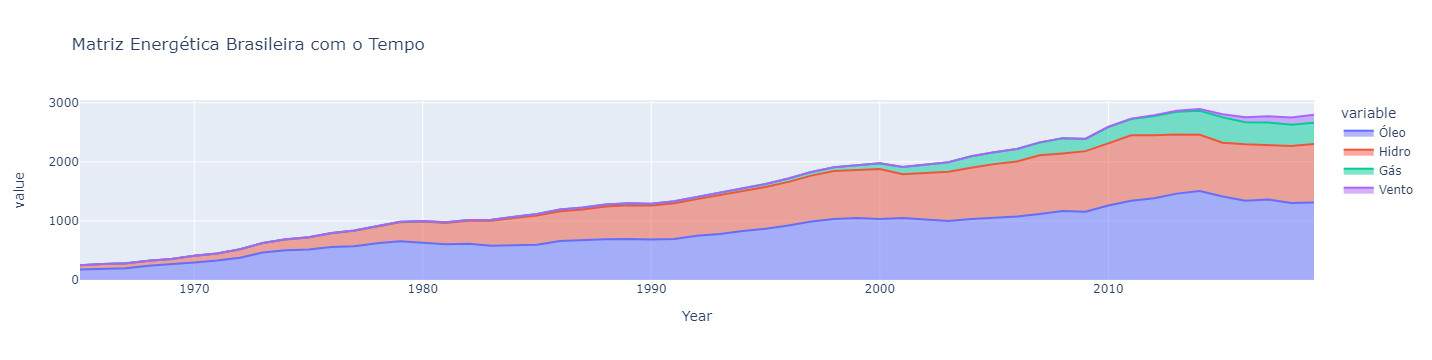

In [50]:
px.area(BrData, x = "Year", y = ["Óleo", "Hidro", "Gás", "Vento"], title = "Matriz Energética Brasileira com o Tempo").show()

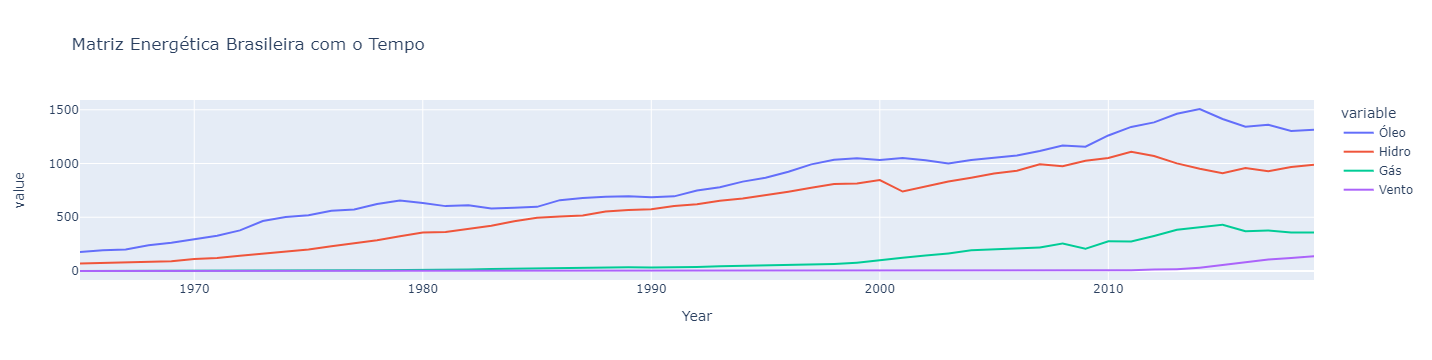

In [46]:
# Com linha acaba sendo bem mais fácil de entender
px.line(BrData, x = "Year", y = ["Óleo", "Hidro", "Gás", "Vento"], title = "Matriz Energética Brasileira com o Tempo").show()

# Comparando o Brasil Externamente
Aqui, percebemos claramente o quanto o Brasil supera grandes potências mundiais quando o assunto é energia hidrelétrica. Mesmo o Estados Unidos, que possui um território maior que o tupiniquim, perde para o Brasil em larga vantagem.

Além disso, pelo gráfico seguinte fica claro que, quando o assunto é economia de carvão, o país ainda sai na frente. Isso porque desde muito antes do aquecimento global ser um assunto seriamente debatido, o Brasil já investia em energia hidrelétrica, enquanto os outros países ainda se baseavam nas usinas termelétricas, movidas a carvão.

Finalmente, observamos que, quando o assunto é energia eólica, o Brasil tem apenas engatinhado. Nações como a Alemanha, que, apesar do pequeno território, investiram pesadamente nessa energia renovável, se destacam muito mais no último gráfico. 

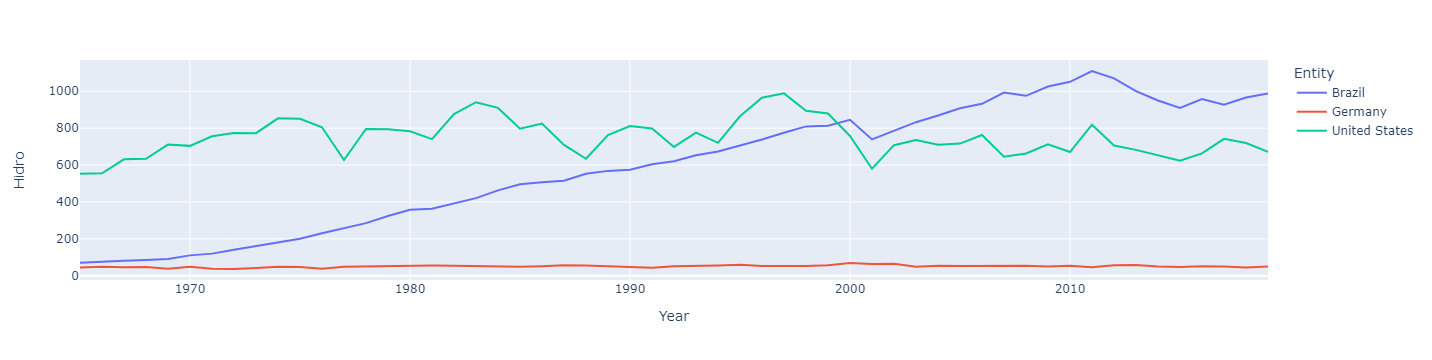

In [47]:
WrldData = data[["Entity", "Hidro", "Carvão", "Vento"]]
WrldData = data[data["Entity"].isin(["Brazil", "Germany", "United States"])]

px.line(WrldData, x = "Year", y = "Hidro", color = "Entity").show()

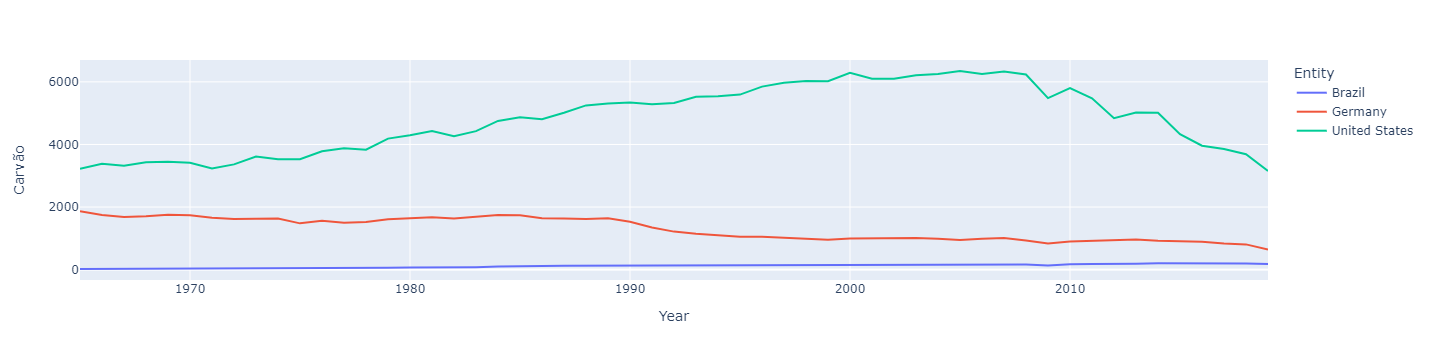

In [48]:
px.line(WrldData, x = "Year", y = "Carvão", color = "Entity").show()

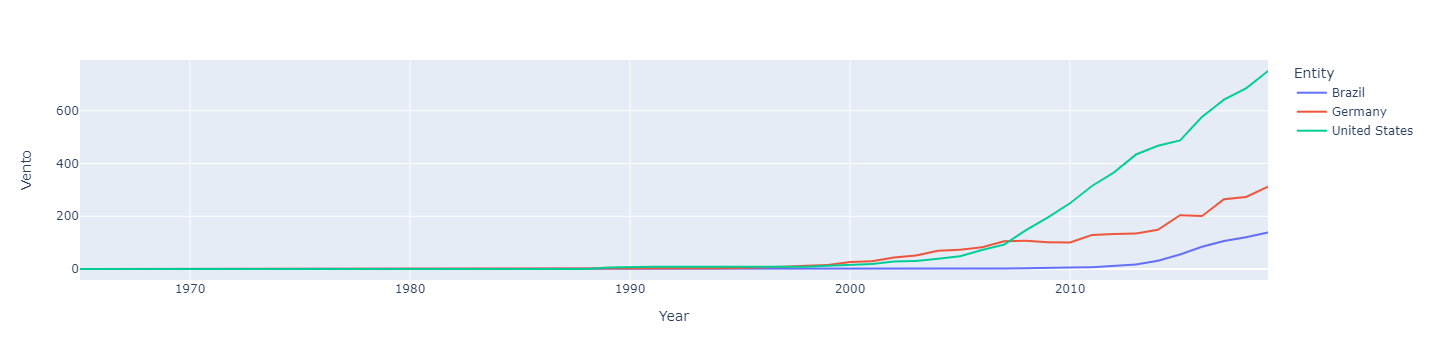

In [49]:
px.line(WrldData, x = "Year", y = "Vento", color = "Entity").show()

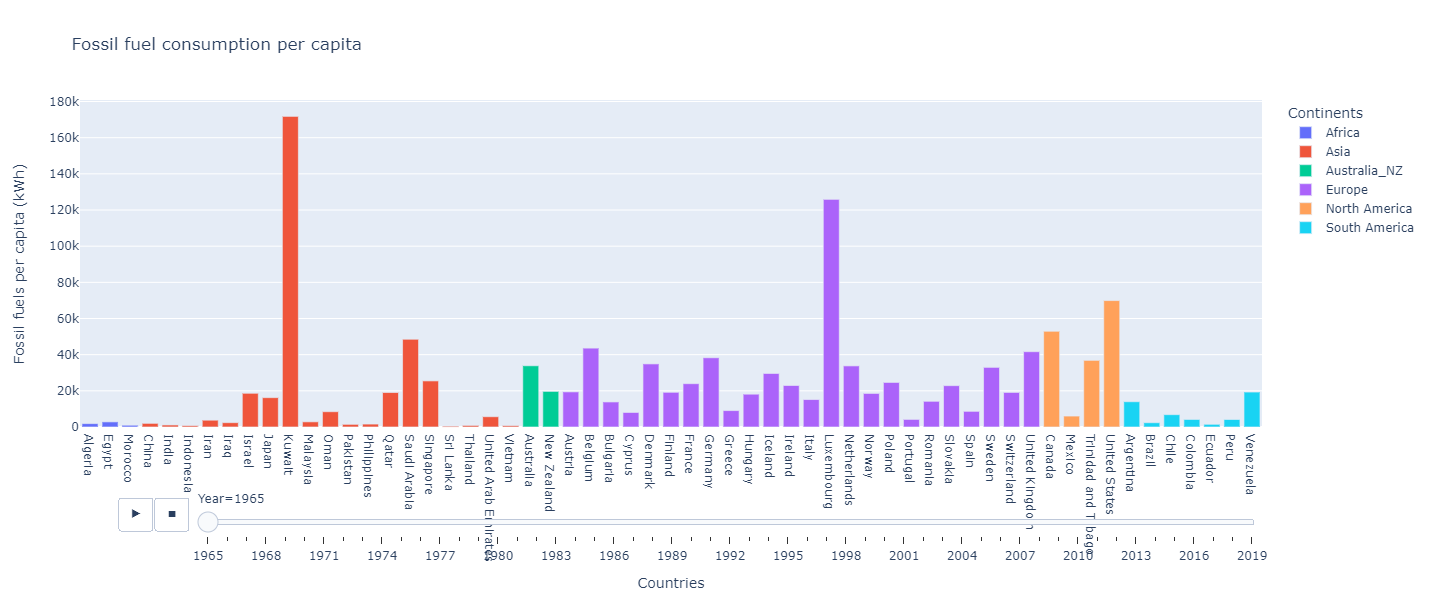

In [54]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

inicial = pd.read_csv("datasets/fossil-fuels-per-capita.csv")
ffpc = pd.DataFrame(inicial)
exclude=["OWID_WRL"]
ffpc=ffpc[~ffpc["Code"].isin(exclude)]
Africa = pd.read_csv("datasets/Countries-Africa.csv")
Asia = pd.read_csv("datasets/Countries-Asia.csv")
Australia_NZ = pd.read_csv("datasets/Countries-Australia-NZ.csv")
Europe = pd.read_csv("datasets/Countries-Europe.csv")
North_America = pd.read_csv("datasets/Countries-North-America.csv")
South_America = pd.read_csv("datasets/Countries-South-America.csv")
Africa_df = pd.DataFrame()
Asia_df = pd.DataFrame()
Australia_NZ_df = pd.DataFrame()
Europe_df = pd.DataFrame()
North_America_df = pd.DataFrame()
South_America_df = pd.DataFrame()
for nome in ffpc["Entity"].unique():
    ffpc_nome = pd.DataFrame(ffpc.loc[ffpc.loc[:, "Entity"] == f"{nome}"])

    if nome in list(Africa["name"]):
        Africa_df = Africa_df.append(ffpc_nome, ignore_index=True)
        Africa_df["Continent"] = "Africa"
    if nome in list(Asia["name"]):
        Asia_df = Asia_df.append(ffpc_nome, ignore_index=True)
        Asia_df["Continent"] = "Asia"
    if nome in list(Australia_NZ["name"]):
        Australia_NZ_df = Australia_NZ_df.append(ffpc_nome, ignore_index=True)
        Australia_NZ_df["Continent"] = "Australia_NZ"
    if nome in list(Europe["name"]):
        Europe_df = Europe_df.append(ffpc_nome, ignore_index=True)
        Europe_df["Continent"] = "Europe"
    if nome in list(North_America["name"]):
        North_America_df = North_America_df.append(ffpc_nome, ignore_index=True)
        North_America_df["Continent"] = "North America"
    if nome in list(South_America["name"]):
        South_America_df = South_America_df.append(ffpc_nome, ignore_index=True)
        South_America_df["Continent"] = "South America"


ffpc_2 = pd.concat([Africa_df, Asia_df, Australia_NZ_df, Europe_df, North_America_df, South_America_df],
                         axis=0, ignore_index=True)

fig=px.bar(x=ffpc_2["Entity"], 
           y=ffpc_2["Fossil fuels per capita (kWh)"], 
           color = ffpc_2["Continent"], 
           animation_frame=ffpc_2["Year"],
           title="Fossil fuel consumption per capita",
           labels={'y':'Fossil fuels per capita (kWh)',
                   'x':'Countries',
                   'color':'Continents',
                   'animation_frame':'Year'})
fig.update_layout(height=600, width=800)
fig.show()

    Decidi fazer um gráfico com animação que, ao longo do tempo, mostrasse o consumo de combustível fóssil per capita de cada país. Como o dataset que peguei não havia informação dos continentes, reutilizei um método que combina outros datasets para trazer esses dados, com a diferença de combinar a variável respectiva ao nome do país ao invés de seu código. Inicialmente, a ideia disso era dividir o resultado final entre 6 gráficos, um para cada continente. Contudo, isso não se mostrou a melhor solução, uma vez que o gráfico em seu tamanho normal já é bastante concentrado, o que fazia com que os 6 gráficos menores ficassem uma bagunça. Decidi então aproveitar que já tinha os continentes para atribuir estes a cor de cada barra, que antes era específica para cada país, o que por sua vez também era um exagero. Assim, creio que esta foi a melhor decisão para a apresentação do gráfico. 

    O que me chamou mais atenção foi que um país estava à frente dos demais, e não era por pouco. Imaginei primeiramente que seria um país como os Estados Unidos, bastante comentado quando o assunto é petróleo. Contudo, se tratava de Catar, um país asiático. Decidi pesquisar e fiquei impressionado: de acordo com o Wikipedia 'Foi um protetorado britânico até ganhar a independência em 1971. Desde então, tornou-se um dos estados mais ricos da região, devido às receitas oriundas do petróleo e do gás natural (possui a terceira maior reserva mundial de gás).  A riqueza e o padrão de vida do Catar se comparam com os dos Estados da Europa Ocidental, tendo o país o maior PIB per capita no mundo árabe de acordo com o Fundo Monetário Internacional (2006) e o maior PIB per capita (com base na paridade do poder de compra) no mundo segundo o CIA World Factbook.

In [3]:
# ================================================ #
#                   Bibliotecas                    #
# ================================================ #

import json
import folium
import pandas as pd
from collections import Counter
import copy

# ================================================ #
#                       Base                       #
# ================================================ #

# Caminho e nome do arquivo
path = "datasets"

# Base de dados, [6958 rows x 4 columns]. Colunas: Entity, Code, Year, Number of people without access to electricity
db_pessoas_sem_eletricidade = pd.read_csv(f"{path}/people-without-electricity-country.csv")

# GeoJson de países
db_paises = json.load(open(f"{path}/countries.geojson"))

# ================================================ #
#                     Código                       #
# ================================================ #

def frequencia(lista):
    """Conta a frequência dos elementos de 'lista' e retorna uma lista de tuplas com elas"""
    
    tabela = Counter(lista)
    freq_numeros = tabela.most_common()
    return freq_numeros

# Para cada ano único na base de dados, itera uma vez
for ano in frequencia(db_pessoas_sem_eletricidade["Year"]):
    
    # Cria o mapa de fundo
    map = folium.Map(location=[-0.001545, 51.477928], zoom_start=2)

    # Cria uma deepcopy da base original para não alterar acidentalmente os arquivos nela
    db_pessoas_sem_eletricidade_por_ano = copy.deepcopy(db_pessoas_sem_eletricidade)

    # Separa a base de dados por linha, checa se a linha tem o ano sendo considerado e se não tiver, exclui a linha    
    for linha in range(len(db_pessoas_sem_eletricidade_por_ano)):
        if db_pessoas_sem_eletricidade_por_ano['Year'][linha] != ano[0]:
            db_pessoas_sem_eletricidade_por_ano = db_pessoas_sem_eletricidade_por_ano.drop(linha)

    # Cria uma camada Choropleth com os dados
    folium.Choropleth(
        geo_data=db_paises,
        name='choropleth',
        data=db_pessoas_sem_eletricidade_por_ano,
        columns=['Entity', 'Number of people without access to electricity'],
        key_on='feature.properties.ADMIN',
        fill_opacity=0.7,
        fill_color='YlGn',
        line_opacity=0.2,
        nan_fill_color='#ffffff',
        # Todos que são 0 ou NaN estão como branco
        bins=[0, 12500000, 25000000, 50000000, 75000000, 100000000, 200000000, 6000000000],
        #
        # Como o bins requer que o último número seja maior que todos os dados, não mostra direito a linha de mudança de cores
        #
        legend_name=f'Número de pessoas sem acesso a eletricidade por país em {ano[0]}
    ).add_to(map)
    
    # Salva o mapa antes de iterar novamente
#     map.save(f"{path}/Número de pessoas sem acesso a eletricidade por país em {ano[0]}.html")

# Mapas de exemplo
![Mapa_1](datasets/1991.png)

![Mapa_1](datasets/2004.png)

![Mapa_1](datasets/1991.png)